# Classification using Multi-Layer-Perceptron


Deep learning steps:
  1. Data Extraction
  2. Data Preprocessing
  3. Model Creation
  4. Model Optimization
  5. Model Fitting
  6. Model Evaluation
  7. Data Visualisation on Evaluation metrics

## 1. Data Extraction

In [ ]:
from sklearn.datasets import load_iris

data=load_iris()
X=data.data
y=data.target

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 2. Data Preprocessing

In [ ]:
#Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [ ]:
#Normalise the features
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## 3. Model Creation

In [ ]:
#Define the Multi-layered Perceptron model
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,Adam

#Create the model
model=Sequential([
    Dense(10,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(8,activation='relu'),
    Dense(5,activation='relu'),
    Dense(3,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4. Model Optimization and Compiling

In [ ]:
#Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])


## 5. Model Fitting

In [ ]:
#Fit the model
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2,verbose=1)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 308ms/step - accuracy: 0.2481 - loss: 1.2267 - val_accuracy: 0.4762 - val_loss: 1.0857
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2481 - loss: 1.2059 - val_accuracy: 0.4762 - val_loss: 1.0836
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2362 - loss: 1.1884 - val_accuracy: 0.4762 - val_loss: 1.0818
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2478 - loss: 1.1711 - val_accuracy: 0.4286 - val_loss: 1.0806
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.2182 - loss: 1.1538 - val_accuracy: 0.3810 - val_loss: 1.0795
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.1105 - loss: 1.1627 - val_accuracy: 0.3810 - val_loss: 1.0778
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.1417 - loss: 1.1455 - val_accuracy: 0.3810 - val_loss: 1.0766
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.1475 - loss: 1.1320 - val_accuracy: 0.3810 - val_loss: 1.0756

## 6. Model Evaluation

In [ ]:
test_loss,test_accu=model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2062 - loss: 1.0911


In [ ]:
print(f"Test Accuracy:{test_accu:.4f}")

Test Accuracy:0.2000


## 7. Data Visualisation of Evaluation metrics

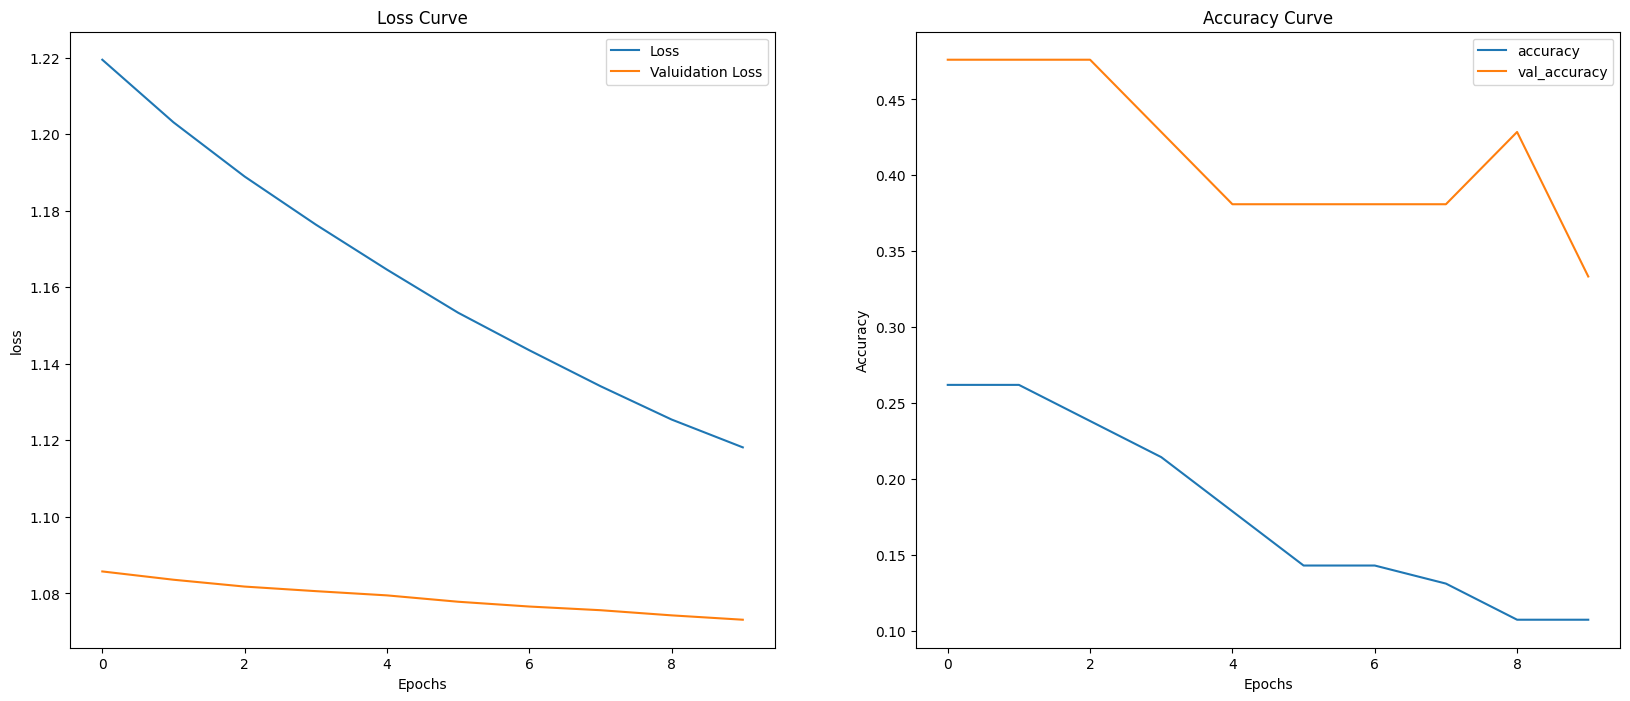

In [ ]:
#Plot the training history

import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Valuidation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title("Loss Curve")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.title('Accuracy Curve')
plt.legend()